In [8]:
# Load activations
import torch
import os
import json
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [6]:
# Load the activations from .pt file
base = "../../../../ignored/"

loaded_dict = torch.load(os.path.join(base, 'liref_data_activations.pt'))
hs_cache_no_cot = loaded_dict['mmlu-pro_3000samples']



In [7]:
# Define reasoning indices

with open(f'{base}/mmlu-pro-3000samples.json', 'r', encoding='utf-8') as f:
    sampled_data = json.load(f)

reason_indices = [ix for ix, sample in enumerate(sampled_data) if sample['memory_reason_score'] > 0.5]
memory_indices = [ix for ix, sample in enumerate(sampled_data) if sample['memory_reason_score'] <= 0.5]

print(len(reason_indices), len(memory_indices))



1379 1621


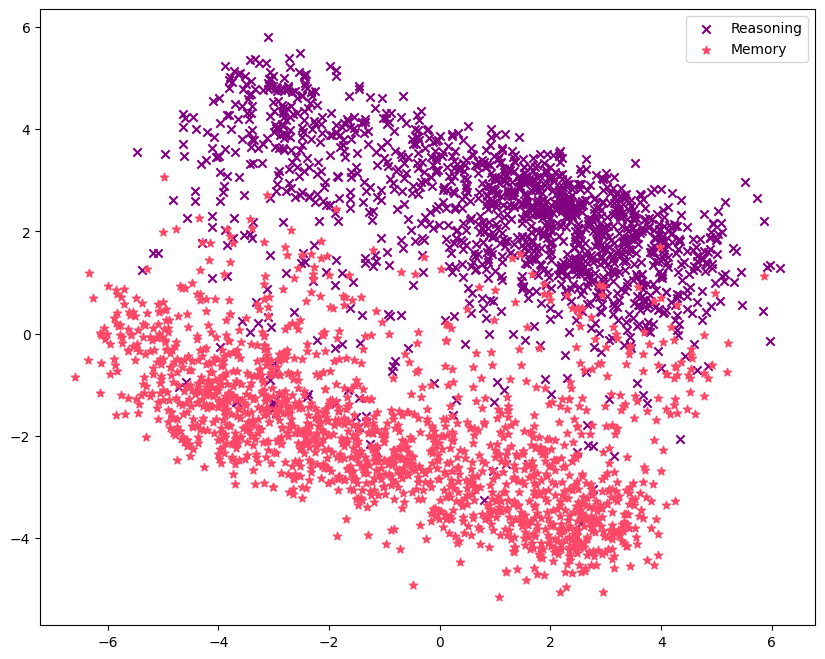

In [9]:
colors_shapes_dict = {
    'mmlu-pro_reason': ['purple','x'], ##2921A2 ##1C1771 #000080
    'mmlu-pro_memory': ['#FE4867', '*']
}

layer = 21

flattend_mmlu = hs_cache_no_cot[layer].squeeze(1)

pca = PCA(n_components=2)
mmlu_pca = pca.fit_transform(flattend_mmlu.cpu().numpy())


fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(mmlu_pca[reason_indices, 0], mmlu_pca[reason_indices, 1], 
           c=colors_shapes_dict['mmlu-pro_reason'][0], 
           marker=colors_shapes_dict['mmlu-pro_reason'][1], 
           label='Reasoning')

ax.scatter(mmlu_pca[memory_indices, 0], mmlu_pca[memory_indices, 1], 
           c=colors_shapes_dict['mmlu-pro_memory'][0], 
           marker=colors_shapes_dict['mmlu-pro_memory'][1], 
           label='Memory')

ax.legend()

plt.show()



